# Convolution Nets for MNIST

In [1]:
#Import the required libraries
import numpy as np
# np.random.seed(1338)

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
from keras.models import Sequential

In [3]:
from keras.layers.core import Dense, Dropout, Activation, Flatten

In [4]:
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

In [5]:
from keras.utils import np_utils
from keras.optimizers import SGD

## Loading Data

In [6]:
path_to_dataset = "/home/ubuntu/deep-learning-keras-tensorflow/data/mnist.pkl.gz"

#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data(path_to_dataset)

In [8]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test_orig = X_test

## Data Preparation

In [10]:
img_rows, img_cols = 28, 28
nb_classes = 10

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)


In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
Y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [23]:
Y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [24]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


# A simple CNN

In [25]:
#Initializing the values for the convolution neural network
nb_epoch = 2
batch_size = 128
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

### Step 1: Model Definition

In [26]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`


### Step 2: Compile

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Step 3: Fit

In [28]:
model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=2,verbose=1,
          validation_data=(X_test, Y_test))

/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 26s 438us/step - loss: 0.7051 - acc: 0.8289 - val_loss: 0.3601 - val_acc: 0.8971
Epoch 2/2
60000/60000 [==============================] - 24s 397us/step - loss: 0.3490 - acc: 0.9006 - val_loss: 0.3092 - val_acc: 0.9124


### Step 4: Evaluate

In [29]:
# Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.309175731695
Test accuracy: 0.9124


### Let's plot our model Predictions!

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

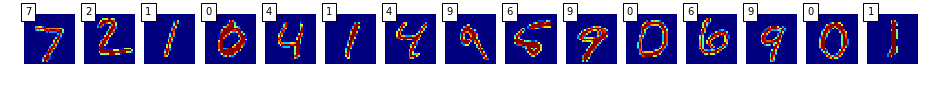

In [31]:
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Adding more Dense Layers

In [32]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`


In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 55s 915us/step - loss: 0.6324 - acc: 0.8480 - val_loss: 0.3163 - val_acc: 0.9109
Epoch 2/2
60000/60000 [==============================] - 56s 935us/step - loss: 0.2940 - acc: 0.9156 - val_loss: 0.2535 - val_acc: 0.9288


In [34]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.253540886793
Test accuracy: 0.9288


# Adding Dropout

In [35]:
import tensorflow as tf
# tf.python.control_flow_ops = tf

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`


In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 75s 1ms/step - loss: 0.8048 - acc: 0.7740 - val_loss: 0.3411 - val_acc: 0.9048
Epoch 2/2
60000/60000 [==============================] - 90s 2ms/step - loss: 0.3783 - acc: 0.8898 - val_loss: 0.2402 - val_acc: 0.9327


In [37]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.240223283434
Test accuracy: 0.9327


# Adding more Convolution Layers

In [38]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
#10 numbers randing between whatever to whateve
model.add(Activation('softmax'))
#10 numbers randing from 0 to 1 that sum up to 1 

/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`


In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 196s 3ms/step - loss: 1.0403 - acc: 0.6683 - val_loss: 0.3277 - val_acc: 0.9064
Epoch 2/2
60000/60000 [==============================] - 202s 3ms/step - loss: 0.4797 - acc: 0.8521 - val_loss: 0.2472 - val_acc: 0.9299


In [40]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.24722215724
Test accuracy: 0.9299


# Exercise

Define and train a convnet with the following architecture:
* ConvLayer with 16 filters of 3 by 3
* relu activation
* Pooling layer of 2x2
* ConvLayer with 32 filters of 3 by 3
* relu activation
* Pooling layer of 2x2
* drop out of 0.5
* fully connected layer with 128 neurons
* relu activation
* drop out of 0.5
* fully connected layer with 128 neurons
* relu activation
* fully connected layer with neuron for every class
* softmax activation

# Solution

In [42]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

model = Sequential()
model.add(Convolution2D(16, 3, 3,
                    border_mode='valid',
                    input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
          optimizer='sgd',
          metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=5,verbose=1,
          validation_data=(X_test, Y_test))


#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 396us/step - loss: 2.2462 - acc: 0.1914 - val_loss: 1.9571 - val_acc: 0.5226
Epoch 2/5
60000/60000 [==============================] - 21s 346us/step - loss: 1.5416 - acc: 0.4801 - val_loss: 0.6093 - val_acc: 0.8559
Epoch 3/5
60000/60000 [==============================] - 25s 417us/step - loss: 0.8284 - acc: 0.7268 - val_loss: 0.3286 - val_acc: 0.9156
Epoch 4/5
60000/60000 [==============================] - 29s 491us/step - loss: 0.5799 - acc: 0.8126 - val_loss: 0.2385 - val_acc: 0.9348
Epoch 5/5
60000/60000 [==============================] - 25s 416us/step - loss: 0.4773 - acc: 0.8487 - val_loss: 0.1955 - val_acc: 0.9444
Test score: 0.195522360513
Test accuracy: 0.9444
